In [9]:
import numpy as np
from math import pi, sin, cos, floor, ceil
import time
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Audio

In [10]:
# TO DO
# fix sample rate constant
# comment code
# fix naming scheme

In [11]:
def textToSound(text): #full wrapper function, converts text into playable sound!
    bytes = textToBytes(text) #works. outputs array of 8-bit strings, corresponding to binary letters
    wave, fs = bytesToWave(bytes) #works. outputs array of points in the wave(???) and plots said array
    return Audio(np.asarray(wave), rate=fs)

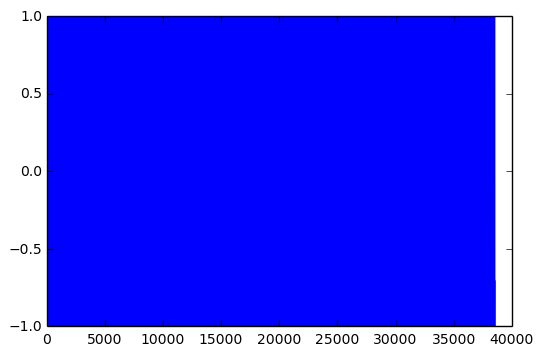

In [24]:
textToSound('no fish') #test of full program

In [5]:
def textToBytes(text): 
    #converts text sample into array of strings, each element corresponds to one letter. 
    #An element is 8 bits (1 byte) of 1s and 0s, just binary equivalent of letter input (including spaces).
    txt2bytes = {"a" : "01100001", "b" : "01100010", "c" : "01100011", "d" : " 01100100", 
                 "e" : "01100101", "f" : "01100110", "g" : "01100111", "h" : "01101000", 
                 "i" : "01101001", "j" : "01101010", "k" : "01101011", "l" : "01101100", 
                 "m" : "01101101", "n" : "01101110", "o" : "01101111", "p" : "01110000", 
                 "q" : "01110001", "r" : "01110010", "s" : "01110011", "t" : "01110100", 
                 "u" : "01110101", "v" : "01110110", "w" : "01110111", "x" : "01111000", 
                 "y" : "01111001", "z" : "01111010", " " : "00100000"}

    characters = list(text)
    bytes = []

    for letter in characters:
        bytes.append(txt2bytes[letter])
    bytes.append("00000000")

    return bytes

In [23]:
def bytesToWave(bytes_input):
    nibbles2angle = {"11" : 0, "01" : (pi/4), "00" : pi, "10" : (3*pi/2)} #dictionary to convert nibbles to angles
    length = 2;
    nibbles = []
    angles = []
    cosine = []
    fs = 22000#<---- FIX THIS NUMBER 
    
    for byte in bytes_input: #translates input into nibbles array, of two-bit strings
        int(byte)
        nibbles.append([byte[i:i+2] for i in range(0, len(byte), 2)])
        
    nibbles = [element for sublist in nibbles for element in sublist] #joins nibbles into 1D list of nibble strings
        
    for nibble in nibbles: #creates angles list out of nibbles list
            x = nibbles2angle[nibble]
            for theta in np.arange(x, x+100*pi+1, (pi/12)):
                angles.append(theta)
                
    for angle in angles: #makes cosine wave out of angles list
        cosine.append(np.cos(angle))
                
    xaxis = np.arange(0,len(cosine),1)
    
    plt.plot(xaxis,cosine) #plot cosine wave
    plt.show()
        
    return cosine, fs #return wave and sample rate for audio playback